# <font color=Blue>Overview</font>
We will analyze the cars dataset from 1984-2020 available at https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle link. It has approx. 41k records with 83 columns about Make, Model, Transmissions details, Fuel type, City/Hwy average etc. We will :- 
* First do some feature engineering and try to identify the features for the model through some data analysis and visualization using Pandas, Matplotlib and Seaborn.
* Try to identify different clusters based on selected features.
* Analyze if there are some linear patteren in the data and use Linear Regression for prediction and also analyze the results of regression.

# Memo

## Executive Summary
We used the KMeans model to identify the clusters between the City Average ( City MPG ) and Linear regression to predict the tailpipe CO2 in grams/mile for fuel type 1 on the basis of the engine displacement in liters and the annual fuel cost for fuelType1.The high level summary of the analysis from 3 models is as below :-
* Identified the clusters between the car average in the city and the year made. The average of the cars increased over the years. We got 3 clusters uing KMeans model.
* Figured out the linear relation between engine displacement in liters and annual fuel cost for fuelType1 to tailpipe CO2 in grams/mile for fuelType1.The R^2 values is 0.877 which explains how well the model is linearly fitting with the data. The Prob (F-Static) value is 0 which proves that the probability of the R^2 value to be random is minimum. So, It is a fairly linear model.
* The binary variables for cylinders in the linear regression model shows how your savings are impacted with the increase in the cylinders. It proves that the car expenditure increases with the increase in the cylinders in the car. The details of the values are explained in the Regression section below.



## Preliminary Analysis
The dataset have 83 columns. So, The preliminary analysis of the dataset is really important to pick the right columns for feature engineering and further analysis. The preliminary analysis of the data shows :-
* 'cylinders', 'displ', 'drive', 'eng_dscr', 'trany', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor', 'mfrCode', c240Dscr', 'c240bDscr', 'startStop' have missing values.
* The count of missing valus in the above columns shows that most of these columns have almost 80-90% missing values except 'cylinders','displ','trany' and 'drive'. So, We will drop the other columns except 'cylinders','displ','trany' and 'drive'.
* Further data analysis shows that there are a lot of atributes with approx. 90% values as 0. Most of these columns shouldn't have 0 values like MPH etc. The columns are 'barrelsA08', 'charge120', 'charge240', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF','co2TailpipeAGpm', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'highwayA08', 'highwayA08U', 'highwayCD','highwayE', 'highwayUF', 'range', 'rangeCity','rangeCityA', 'rangeHwy', 'rangeHwyA','UCityA','charge240b','phevCity', 'phevHwy','phevComb'. So, We dropped these columns as well from the dataset.
* There are also a lot of -1 or 0 values in few other fields. __Figure 1__ (Bar chart) shows that most of the values for specific columns are eithet 0 or 1. The description of these columns shows that -1 means that the value is not available. So, we dropped 'co2','co2A', 'UHighwayA','highway08U','comb08U','city08U','fuelCostA08','ghgScore', 'ghgScoreA','feScore','pv2','lv2', 'lv4', 'pv4','hlv', 'hpv' columns as well.

Finally, We got our dataset for the models with 23 columns. We will only consider 'id',  'make', 'model','trany','cylinders','drive','fuelType1','fuelType', 'VClass', 'year','engId', 'mpgData', 'phevBlended','displ', 'city08','UCity','highway08','UHighway','comb08','barrels08', 'fuelCost08','co2TailpipeGpm','youSaveSpend' columns for our further analysis and model.

## Feature Engineering 
This section will explain the rational behind using the selected features for the KMean and Linear regression model.
* I used City MPG (city08 column in the dataset) and Model Year (year) for the cluster analysis as we are seeing that the averages are getting better year after year. I was also interested to see how much the Hybrid and electric cars contributed over the years in averages.
    * The __Figure 2__ (Box plot) shows that there are outliers in the dataset but I further analyzed the data to confirm the Fuel Type of these outliers. I figured out that all the cars above 58 City MPG are Electric cars only. So, This proves that these are actually not outliers but this is the actual data and the high city MPG is for Electric cars.
* I did a correlation of the Qualtative values in the selected dataset in __Correlation Heat Map__ to figure out which values are fairly related. Most of the values are related to MPG like city MPG, Highway MPG and combined etc. So, These will definitely have a strong correlation. The Heatmap showed Engine Displacement in liters and CO2 emmision highly correlated. So, I checked if the plot shows some linear relation between these 2 and to identify other linear relations to use in the OLS model usng seaborn pairplot.
    * Pairplot showed faily linear relation between Engine Displacement in liters and CO2 emmision highly correlated. I used these 2 for the OLS model and I got 0.636 R^2 value which was fairly good.
    * I tried to check if more features will help increasing the R^2 value. I saw yearly fuel cost is also having a good linear relation in the pairplot. So, I added Fuel cost as well in the model.
* Lastly, I tried the regression with binary variables, I first checked the categorical values distinct count. I wanted to predict the saving value based on transmission, Make, model, drive and cylinders etc. Most of the these values were more than 10. So, I tried with all the values less than equal to 10. Most of the featured were not fitting well and had a values less tha 0.5 except cylinders which is more close to 0.6+. So, I selected the feature as cylinder and savings/spent.

## Cluster Analysis
We opted for City MPG (city08 column in the dataset) and Model Year (year) for the cluster analysis as explained above. There were three clusters between the car average in the city and the year made. The clusters shows that the average of the cars increased over the years. We used the KMeans model to identify th clusters. The details regarding the clusters are as below :-
* The first cluster have the avarage between 5-40 MPG with the year starting from 1984 till 2000. This shows that the efficiency of the cars used to be on the lower side at that time.
* The second cluster between year 2000-2020 with minimum average increased slightly starting from approx. 10 MPG and ranges till 60 MPG. This shows the increasing tremd in the efficiency from 2000.
* The third cluster is majorly starting from 2010 - 2012 timeframe till 2020. This cluster have average from 70-150. This look like an outlier at the first sight but I figured out that these are actually Electric cars after detailed analysis of the data. This shows the efficiencies have increased a lot over the last 5-8 years majorly because of the Hybrid and Electric cars.

## Regression
This section will explain the outcome of both the regressions models - Regular Liner Regression Model and Linear Regression model with Binary values

1) __Regular Linear Regression Model__ - We selected engine displacement in liters (displ) and annual fuel cost for fuelType1 (fuelCost08) to predict tailpipe CO2 in grams/mile for fuelType1 (co2TailpipeGpm) for the first linear regression as explained in the Feature Engineering section.
    * The R^2 values came out as 0.878 matching with the Adj. R^2 value. It proves that the model is fitting well and we should be able to get fairly good predictions out of the model.
    * The Prob (F-Statistic) value is less than 0.00 which confirms that it is a fairly linear model.
    * The constant co-efficient value is 69.6949 and ranging from 66.204 to 73.186 which means that the CO2 (g/m) intercept will be approx. 69 at the minimum.
    * The displacement in ltrs co-efficient value came out as 18 (approx.). So, every addition in the displacement will add a factor of 18 to the CO2 emmission.
    * The Annual Fuel cost co-efficient is 0.1455 which is very less. It makes complete sense because if you will spend \\$1 extra for the yearly fuel cost,  It won't add that much to the carbon emission but if your cost increase by \\$100, it will have a major impact on emission.
    * The test results are almost aligned with the train results. So, It is a perfectly fit model.
2)  __Linear Regression model with Binary values__ - We selected "Cylinders" as the feature for the Regression model with binaries based on the aove criteria explained in the Feature engineering section. We took a train/test approach for this model to check the accuracy of the model. Below is the explanation of the model outcome :-
    * The R^2 values is 0.610 again exactly matching with the Adj. R^2 value. It shows that the model is fitting well and is 61% linear and predictions from this model should be fairly good.
    * The Prob (F-Statistic) value is 0.00 which means that it is a good linear model as the probability of the R^2 value to be random is 0%.So, The more the R^2 value is fixed. The more confidence we can have on the model.
    * The constant co-efficient value is -3505.2083 and ranging from -4061.737 to -2948.680 which means whatever number of cylinders we will have, it will reduce the savings value by approx. \\$3505.
    * The coefficient value for all the cylinder is reducing as these are in comparision to 2 cylinders. It makes complete sense because as you add cylinders, you will actually spend more on the fuel. Hence. less savings. For eg. :-If we have a 4 cylinder car, our saving will be 2120 (coefficient of 4 cylinders) -3505 (constant coefficient) = -\\$1385 over a 2 cylinders car. It makes complete sense that if one have a 4 cylinder that he will actually spent more on the fuel cost.
    * The test results ae also good with R^2 values as 0.611 which is very close to the train results. I tried with multiple train and test percentage but the model was underfitting with value other than 10%. The results are close with 10%. So, I kept it as 10%. 


## Appendix
Below are the main take aways of all the model analysis :-
  * The efficiency of the cars has increased over the period of time. Especially with the Hybrid and Electric cars in the past 5-8 years, It has gone beyond 100 miles. __Figure 3__ (Scatter Plot) in the below analysis shows that 3rd cluster between 2012-2020 which has the highest efficiency range netween 70-150.
  * The Linear Regression explains that the more the displacement in engine, the more will be the carbon emission. __Figure 4__ (PairPlot) & __Figure 5__ (Regression Stats) shows that with every increase in the displacement, the carbn emission will increase by a factor of 18. Year Fuel cost is also playing a role. Th more you spend on fuel the more CO2 emission will be there.
  * The Regresson with binary values proves that the saving will be less with the increase in th cylinders. The cylinder coefficient values in __Figure 6__ (Regression Stats for Binary Values) shows the as the number of cylinder increases the expenditure will be more as the coefficient value is increasing on the negative side.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# This is the KMeans library
from sklearn.cluster import KMeans

# The following are libraries that allow us to scale the data automatically.
from sklearn.preprocessing import scale, StandardScaler

df = pd.read_csv('cars.csv')
print(df.shape)
print(df.columns)
df.head()

(41342, 83)
Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn',

C:\Users\sachi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (68,70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [2]:
# The below code will find the columns with null values and the count of missing values in each column

print(df.columns[df.isnull().any()])
print(df[['cylinders', 'displ', 'drive', 'eng_dscr', 'trany', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'startStop']].isnull().sum())

Index(['cylinders', 'displ', 'drive', 'eng_dscr', 'trany', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'startStop'],
      dtype='object')
cylinders       209
displ           207
drive          1189
eng_dscr      16192
trany            11
guzzler       38915
trans_dscr    26295
tCharger      34379
sCharger      40486
atvType       37749
fuelType2     39726
rangeA        39731
evMotor       40475
mfrCode       30818
c240Dscr      41258
c240bDscr     41262
startStop     31704
dtype: int64


In [3]:
# This will show the distinct values of all the below columns and will return the first row with the maximun count.

print(df[['barrelsA08', 'charge120', 'charge240', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF','co2TailpipeAGpm',
          'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'highwayA08', 'highwayA08U', 'highwayCD','highwayE', 'highwayUF',   
          'range', 'rangeCity','rangeCityA', 'rangeHwy', 'rangeHwyA','UCityA','charge240b','phevCity', 'phevHwy','phevComb']].value_counts().head(1))

barrelsA08  charge120  charge240  cityA08  cityA08U  cityCD  cityE  cityUF  co2TailpipeAGpm  combA08  combA08U  combE  combinedCD  combinedUF  highwayA08  highwayA08U  highwayCD  highwayE  highwayUF  range  rangeCity  rangeCityA  rangeHwy  rangeHwyA  UCityA  charge240b  phevCity  phevHwy  phevComb
0.0         0.0        0.0        0        0.0       0.0     0.0    0.0     0.0              0        0.0       0.0    0.0         0.0         0           0.0          0.0        0.0       0.0        0      0.0        0.0         0.0       0.0        0.0     0.0         0         0        0           39520
dtype: int64


In [4]:
# Removing 'eng_dscr', 'guzzler','trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA','evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'startStop'
# 'barrelsA08', 'charge120', 'charge240', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF','co2TailpipeAGpm','combA08', 'combA08U', 'combE', 'combinedCD', 
# 'combinedUF', 'highwayA08', 'highwayA08U', 'highwayCD','highwayE', 'highwayUF','range', 'rangeCity','rangeCityA', 'rangeHwy', 'rangeHwyA','UCityA','charge240b',
# 'phevCity', 'phevHwy','phevComb' columns based on above analysis as most of the valus in these columns are 0 only.

df2 = df[['barrels08','city08','city08U','co2','co2A','co2TailpipeGpm','comb08', 'comb08U','cylinders','displ', 'drive', 'engId', 'feScore', 'fuelCost08',
        'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA','highway08', 'highway08U', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
        'model', 'mpgData', 'phevBlended', 'pv2', 'pv4','trany','UCity', 'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend']]
df2.dropna().shape

(39950, 39)

In [5]:
print(df2[['co2','co2A', 'UHighwayA','highway08U','comb08U','city08U','fuelCostA08','ghgScore', 'ghgScoreA','feScore','pv2','lv2',
          'lv4', 'pv4','hlv', 'hpv']].value_counts())

# The below stats shows that there are still columns with a lot of 0 and -1 values.

co2   co2A  UHighwayA  highway08U  comb08U  city08U  fuelCostA08  ghgScore  ghgScoreA  feScore  pv2  lv2  lv4  pv4  hlv  hpv
-1    -1    0.0        0.0000      0.0000   0.0000   0            -1        -1         -1       0    0    0    0    0    0      13415
                                                                                                          14   97   0    0        163
                                                                                                70   5    0    0    0    0        137
                                                                                                0    0    0    0    12   85       134
                                                                                                          12   89   0    0        112
                                                                                                                                ...  
 320  -1    0.0        32.9260     27.6310  24.4182  0             7   

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'Figure 1 - Bar Chart')

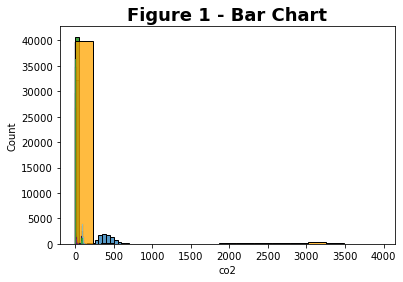

In [6]:
# I wanted to do further analysis on the columns in above cell before dropping the columns.

print(sns.histplot(df2.co2))
print(sns.histplot(df2.co2A,color = 'g'))
print(sns.histplot(df2.UHighwayA,color = 'r'))
print(sns.histplot(df2.highway08U,color = 'brown'))
print(sns.histplot(df2.city08U,color = 'maroon'))
print(sns.histplot(df2.fuelCostA08,color = 'orange'))
print(sns.histplot(df2.ghgScore,color = 'gold'))
print(sns.histplot(df2.ghgScoreA,color = 'yellow'))
print(sns.histplot(df2.feScore,color = 'darkred'))
print(sns.histplot(df2.pv2,color = 'navy'))
print(sns.histplot(df2.lv2,color = 'lightgreen'))
print(sns.histplot(df2.lv4,color = 'violet'))
print(sns.histplot(df2.pv4,color = 'skyblue'))
print(sns.histplot(df2.hlv,color = 'purple'))
print(sns.histplot(df2.hpv,color = 'limegreen'))
plt.title("Figure 1 - Bar Chart", fontdict= { 'fontsize': 18, 'fontweight':'bold'})

In [7]:
# The below code will fetch the actual counts of the 0 or -1 values for the columns in above cell.

print('The count of values of co2 in (-1,0) is {}'.format( df2.co2.loc[ df2['co2'].isin([-1,0])].count()))
print(df2.co2A.loc[ df2['co2A'].isin([-1,0])].count())
print(df2.UHighwayA.loc[ df2['UHighwayA'].isin([-1,0])].count())
print(df2.highway08U.loc[ df2['highway08U'].isin([-1,0])].count())
print(df2.comb08U.loc[ df2['comb08U'].isin([-1,0])].count())
print(df2.city08U.loc[ df2['city08U'].isin([-1,0])].count())
print(df2.fuelCostA08.loc[ df2['fuelCostA08'].isin([-1,0])].count())
print(df2.ghgScore.loc[ df2['ghgScore'].isin([-1,0])].count())
print(df2.ghgScoreA.loc[ df2['ghgScoreA'].isin([-1,0])].count())
print(df2.feScore.loc[ df2['feScore'].isin([-1,0])].count())
print(df2.pv2.loc[ df2['pv2'].isin([-1,0])].count())
print(df2.lv2.loc[ df2['lv2'].isin([-1,0])].count())
print(df2.lv4.loc[ df2['lv4'].isin([-1,0])].count())
print(df2.pv4.loc[ df2['pv4'].isin([-1,0])].count())
print(df2.hlv.loc[ df2['hlv'].isin([-1,0])].count())
print(df2.hpv.loc[ df2['hpv'].isin([-1,0])].count())


The count of values of co2 in (-1,0) is 32160
40722
39772
29662
29662
29662
39821
32027
40703
32027
34623
34615
26752
26752
36413
36414


In [8]:
# Dropping 'co2','co2A', 'UHighwayA','highway08U','comb08U','city08U','fuelCostA08','ghgScore', 'ghgScoreA','feScore','pv2','lv2', 'lv4', 'pv4','hlv', 'hpv' 
# columns as well as most of the values in these columns are either 0 or -1.

df2 = df2[['id',  'make', 'model','trany','cylinders','drive','fuelType1','fuelType', 'VClass', 'year','engId', 'mpgData', 'phevBlended','displ',
           'city08','UCity','highway08','UHighway','comb08','barrels08', 'fuelCost08','co2TailpipeGpm','youSaveSpend']]
print(df2.dropna().shape)
df2.head()

(39950, 23)


,id,make,model,trany,cylinders,drive,fuelType1,fuelType,VClass,year,...,displ,city08,UCity,highway08,UHighway,comb08,barrels08,fuelCost08,co2TailpipeGpm,youSaveSpend
0,1,Alfa Romeo,Spider Veloce 2000,Manual 5-spd,4.0,Rear-Wheel Drive,Regular Gasoline,Regular,Two Seaters,1985,...,2.0,19,23.3333,25,35.0000,21,15.695714,1950,423.190476,-2000
1,10,Ferrari,Testarossa,Manual 5-spd,12.0,Rear-Wheel Drive,Regular Gasoline,Regular,Two Seaters,1985,...,4.9,9,11.0000,14,19.0000,11,29.964545,3750,807.909091,-11000
2,100,Dodge,Charger,Manual 5-spd,4.0,Front-Wheel Drive,Regular Gasoline,Regular,Subcompact Cars,1985,...,2.2,23,29.0000,33,47.0000,27,12.207778,1550,329.148148,0
3,1000,Dodge,B150/B250 Wagon 2WD,Automatic 3-spd,8.0,Rear-Wheel Drive,Regular Gasoline,Regular,Vans,1985,...,5.2,10,12.2222,12,16.6667,11,29.964545,3750,807.909091,-11000
4,10000,Subaru,Legacy AWD Turbo,Manual 5-spd,4.0,4-Wheel or All-Wheel Drive,Premium Gasoline,Premium,Compact Cars,1993,...,2.2,17,21.0000,23,32.0000,19,17.347895,2650,467.736842,-5500


In [9]:
df2.describe()

,id,cylinders,year,engId,displ,city08,UCity,highway08,UHighway,comb08,barrels08,fuelCost08,co2TailpipeGpm,youSaveSpend
count,41342.000000,41133.000000,41342.000000,41342.000000,41135.000000,41342.000000,41342.000000,41342.000000,41342.000000,41342.000000,41342.000000,41342.000000,41342.000000,41342.000000
mean,20789.693798,5.715824,2001.623506,8129.218640,3.293818,18.382565,23.222574,24.520609,34.368674,20.630908,17.273710,2309.645155,466.085361,-3792.922452
std,12059.983083,1.755039,11.188251,17227.214375,1.357638,7.926209,11.258293,7.743662,11.275785,7.692512,4.621490,636.128013,123.581028,3187.249807
min,1.000000,2.000000,1984.000000,0.000000,0.000000,6.000000,0.000000,9.000000,0.000000,7.000000,0.060000,500.000000,0.000000,-28250.000000
25%,10336.250000,4.000000,1991.000000,0.000000,2.200000,15.000000,18.268400,20.000000,27.931325,17.000000,14.330870,1900.000000,386.391304,-5500.000000
50%,20672.500000,6.000000,2002.000000,182.000000,3.000000,17.000000,21.400000,24.000000,33.298750,20.000000,16.480500,2300.000000,444.350000,-3750.000000
75%,31278.750000,6.000000,2012.000000,4170.000000,4.300000,21.000000,25.989800,28.000000,39.000000,23.000000,19.388824,2650.000000,522.764706,-1750.000000
max,41687.000000,16.000000,2020.000000,69102.000000,8.400000,150.000000,224.800000,124.000000,182.700000,136.000000,47.087143,7200.000000,1269.571429,5250.000000


Text(0.5, 1.0, 'Figure 2 - Box Plot')

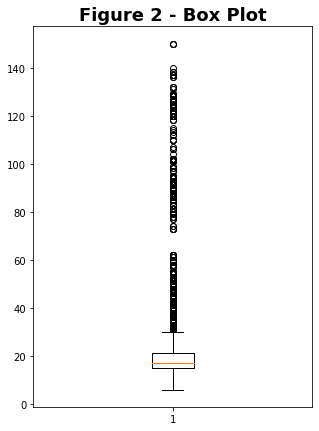

In [10]:
# The City MPG values have a range from 6 to 150. This is beyond the regulat MPG range. So, The below code will help to check the outliers.

plt.subplots(figsize = (5,7))
plt.boxplot(x='city08', data = df2)
plt.title("Figure 2 - Box Plot", fontdict= { 'fontsize': 18, 'fontweight':'bold'})

In [11]:
# The above Box Plot shows that the values more than 30 are outliers but I wanted to see the Fuel Type for these outlier.

df2.loc[df2['city08'] > 58]['fuelType'].value_counts()

# The output shows that the fuel type for these outliers is Electricity. So, These are actually not outliers but real significant data. 
# So, I won't drop these records and will continue with the cluster analysis.

Electricity    196
Name: fuelType, dtype: int64

In [12]:
# I chose the year and city MPG value for cluster analysis to see how the efficiency changes over years.

dfCluster = df2[['year','city08']].copy()
dfCluster.isnull().sum()
df_Cluster = dfCluster.dropna()

In [13]:
import sklearn
import numpy as np

# This is the KMeans library
from sklearn.cluster import KMeans

# The following are libraries that allow us to scale the data.
from sklearn.preprocessing import scale, StandardScaler

In [14]:
scaler = StandardScaler()

scaler.fit(df_Cluster)
scaled_array = scaler.transform(df_Cluster) 

average = np.mean(scaled_array[:,0])
std = np.std(scaled_array[:,0])
print('\nCity MPG mean is {:.6f}.'.format(average))
print('City std is {:.6f}.'.format(std))
print('Make Year mean is {:.6f}.'.format(np.mean(scaled_array[:,1])))
print('Make Year standard deviation is {:.6f}.'.\
      format(np.std(scaled_array[:,1])))


City MPG mean is 0.000000.
City std is 1.000000.
Make Year mean is -0.000000.
Make Year standard deviation is 1.000000.


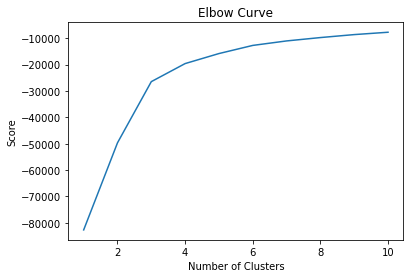

In [15]:
df3 = scaled_array
max_clusters = 10 # max number of cluster to display in elbow curve

noClusters = range(1, max_clusters + 1) # returns a list from 1 to 11
kmeans = [KMeans(n_clusters = i) for i in noClusters] 
score = [kmeans[i].fit(df3).score(df3) for i in range(len(kmeans))] # list comprehension
plt.plot(noClusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel("Score")
plt.title('Elbow Curve')
plt.show()

In [16]:
kmeans = KMeans(n_clusters = 3, \
            random_state = 42)
kmeans = kmeans.fit(scaled_array) 

In [17]:
unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
unscaled

array([[1991.20611743,   17.12250231],
       [2010.89938531,   18.74982669],
       [2015.65775401,  107.40641711]])

In [18]:
centroids = pd.DataFrame({'centroidx':unscaled[:,0],\
            'centroidy':unscaled[:,1]})

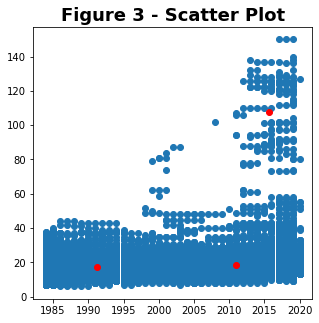

In [19]:
plt.subplots(figsize = (5,5))
plt.scatter(df_Cluster['year'], df_Cluster['city08']) # (x,y,color), 
plt.scatter(centroids['centroidx'], \
            centroids['centroidy'], c='red') # (x,y,color)
plt.title("Figure 3 - Scatter Plot", fontdict= { 'fontsize': 18, 'fontweight':'bold'})
plt.show()

# Th below scatter plot shows 3 clusters. Detailed analysis in the Memo above.

<AxesSubplot:title={'center':'Correlation Heat Map'}>

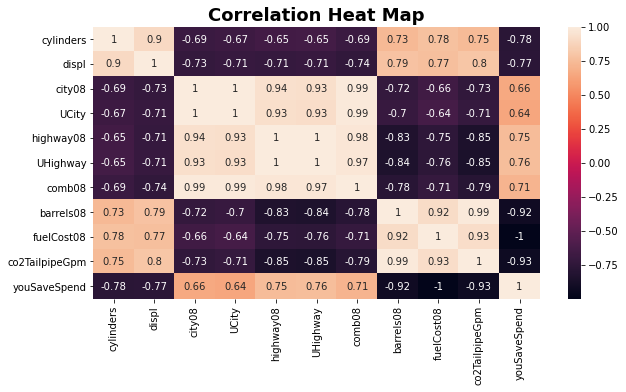

In [20]:
# The below heat map will show the correlation between the different attributes in dataframe df2. It will help us to select the features for the Regression model.

df4 = df2[['cylinders','displ','city08','UCity','highway08','UHighway','comb08','barrels08', 'fuelCost08','co2TailpipeGpm','youSaveSpend']]
plt.subplots(figsize = (10,5))
plt.title("Correlation Heat Map", fontdict= { 'fontsize': 18, 'fontweight':'bold'})
sns.heatmap(df4.corr(),annot = True)

__<h3 align='center'> Figure 4 - Pair Plot </h3>__

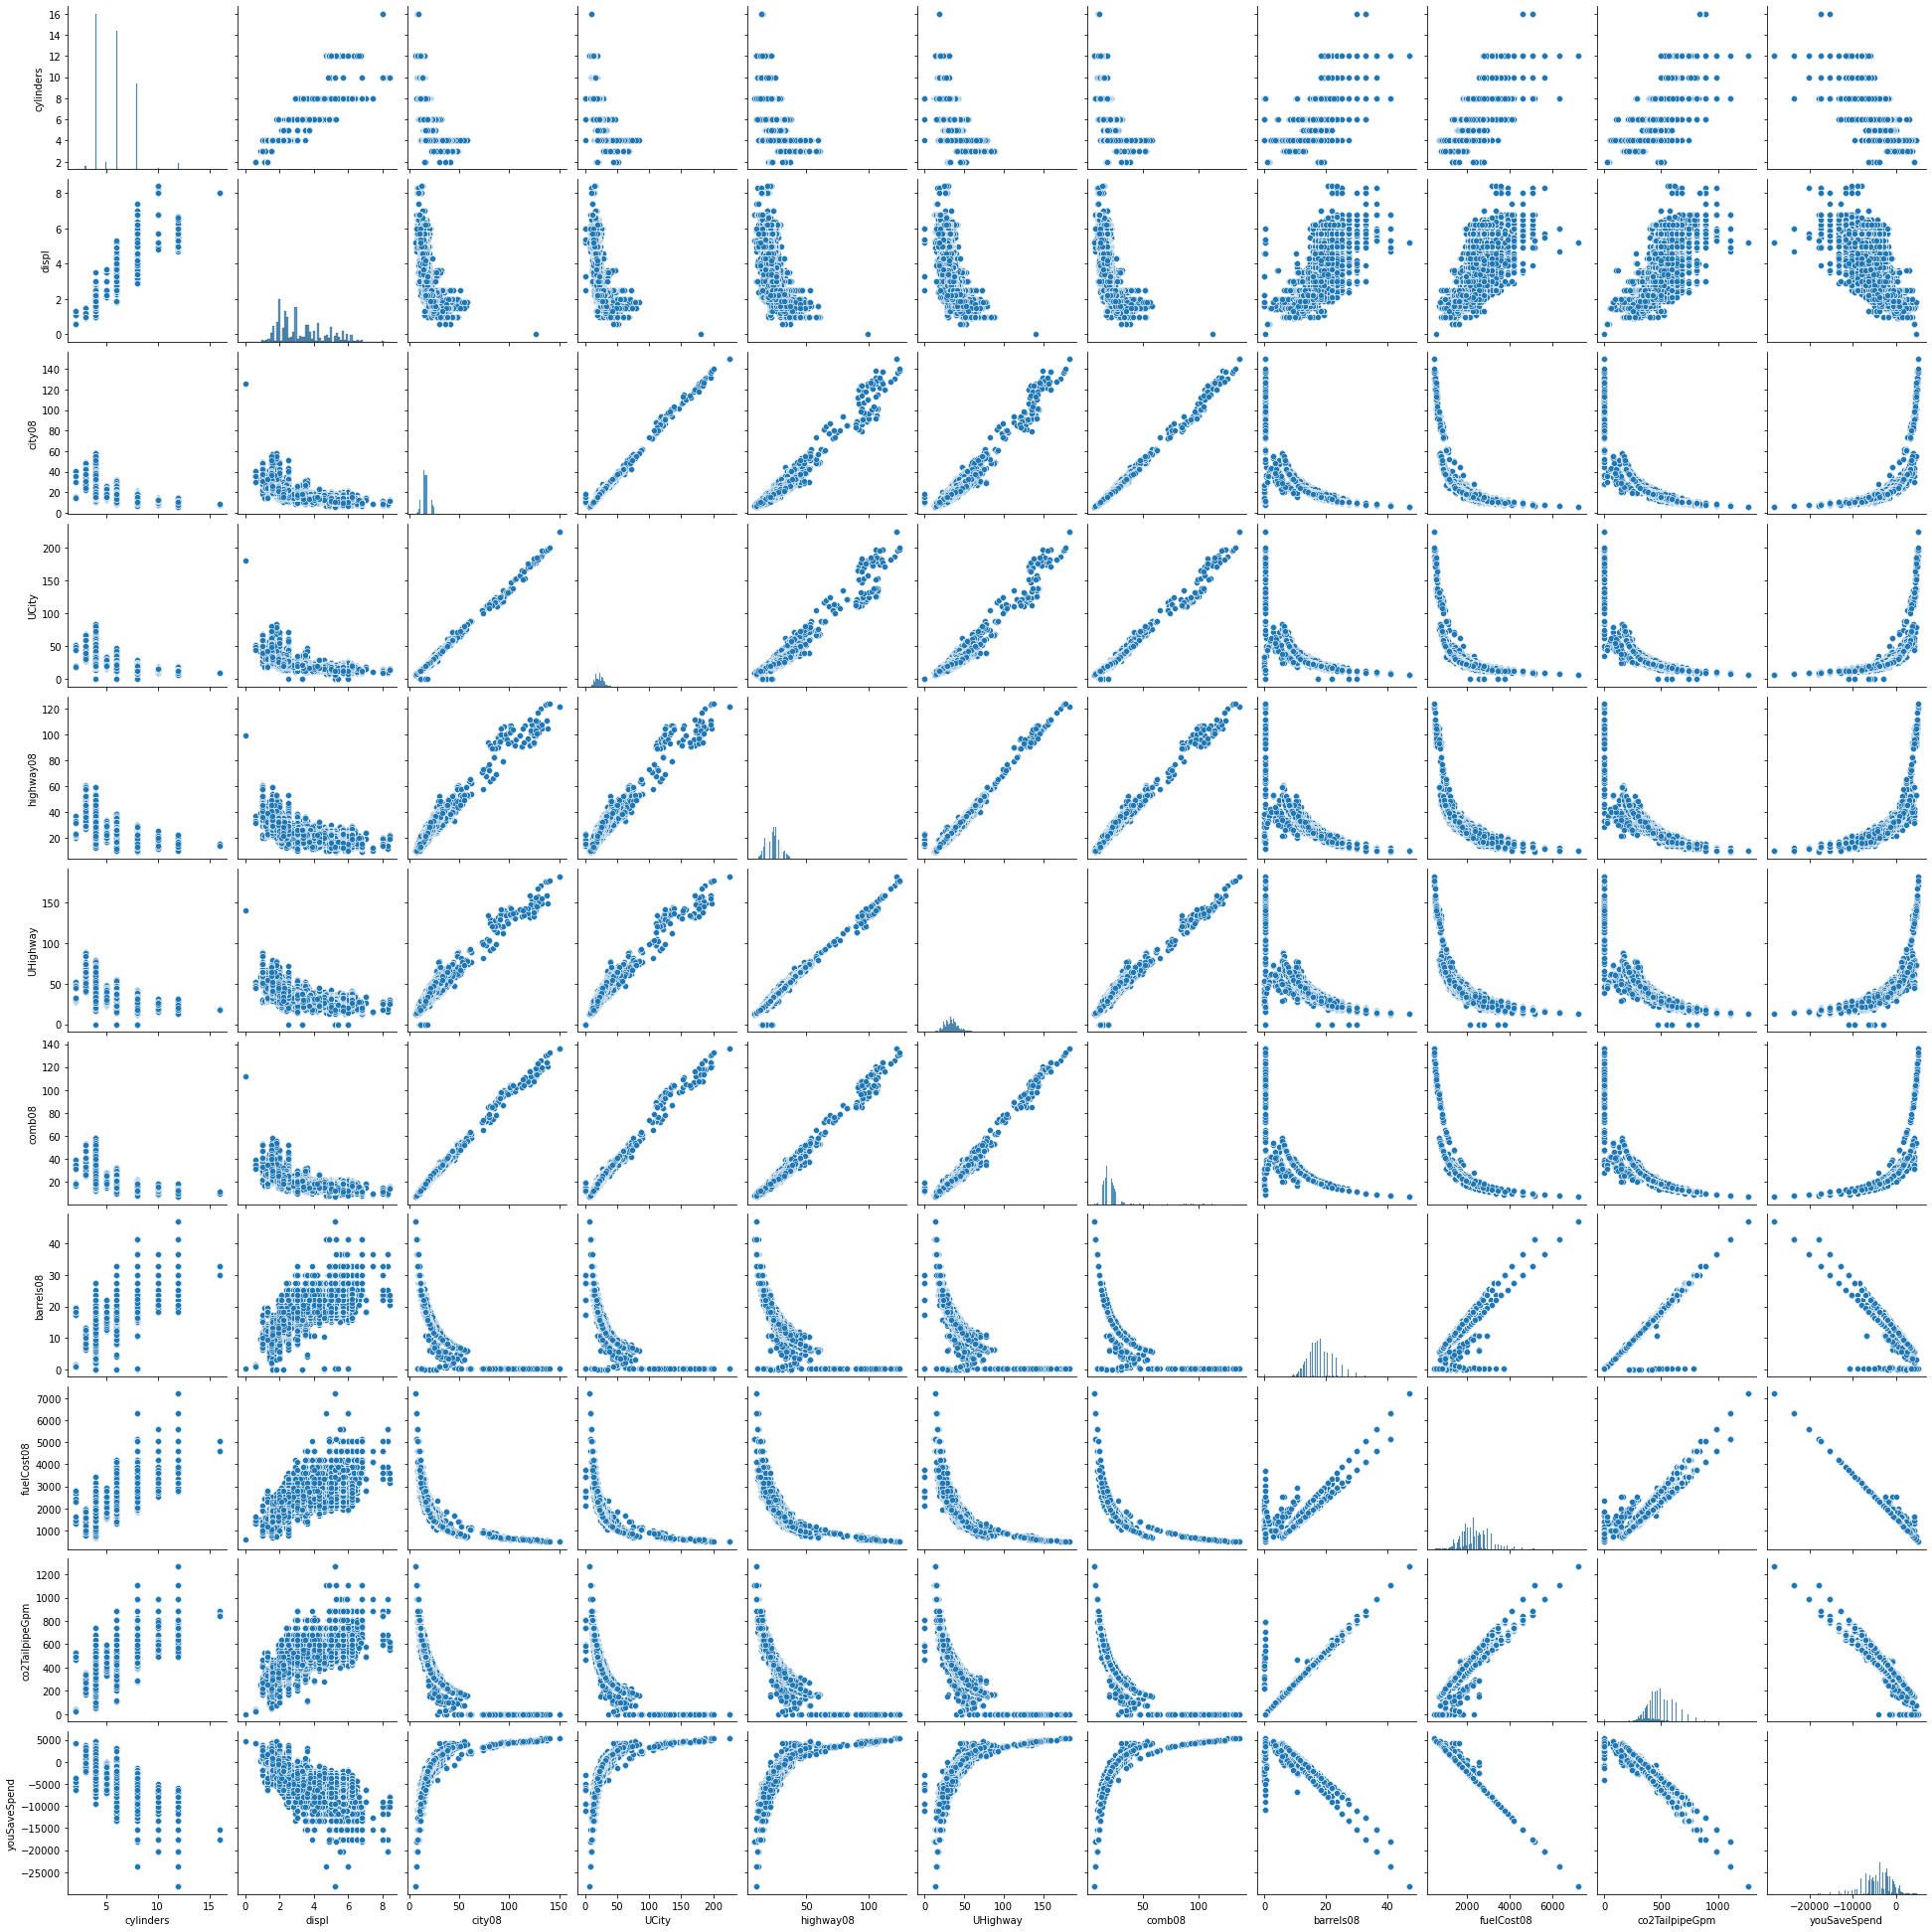

In [21]:
# The below pair plot will show the relation between the different attributes in dataframe df2. It will help us to select the features for the Regression model.

sns.pairplot(df4)

In [22]:
# split data into X and Y dataframes
# We chose the displ and fuel cost as 2 features based on the above Heat map and Pair plot to decide the Co2 emmissions.
df_reg = df4[['displ','fuelCost08','co2TailpipeGpm']].dropna()
X = df_reg[['displ','fuelCost08']].copy()
Y = df_reg['co2TailpipeGpm'].copy()

In [23]:
# Split the dataset into the Training set and Test set
# test_size reflects the % to use in the test set.  Usually set to around 0.3, but we
# have a small sample
# To get the same results every time, set random_state to the same value (e.g., 0).

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
        test_size = 0.8, random_state = 42)

__<h3 align='center'> Figure 5 -  Regression Stats </h3>__

In [24]:
# Run regression using statsmodels
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train) # required if constant expected
est = sm.OLS(y_train,X_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:         co2TailpipeGpm   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 2.971e+04
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:16:47   Log-Likelihood:                -42397.
No. Observations:                8227   AIC:                         8.480e+04
Df Residuals:                    8224   BIC:                         8.482e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.6949      1.781     39.133      0.0

In [25]:
# Run regression using statsmodels
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

X_test = sm.add_constant(X_test) # required if constant expected
est = sm.OLS(y_test,X_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:         co2TailpipeGpm   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                 1.170e+05
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:16:48   Log-Likelihood:            -1.6959e+05
No. Observations:               32908   AIC:                         3.392e+05
Df Residuals:                   32905   BIC:                         3.392e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.6413      0.897     77.606      0.0

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = est.model.exog # get model features
vif = pd.DataFrame() # create a dataframe
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["features"] = X_train.columns
print('VIF: {}'.format(vif))

VIF:    VIF Factor    features
0   15.115174       const
1    2.451755       displ
2    2.451755  fuelCost08


The above Linear Regression model shows that a linear relation between the Engine Displacement and the Yearly Fuel Cost. The detail explanation is provded in the Memo above.

The VIF score is also close to 2. We discussed that it should be less than 2 but most of the attributes in the dataset and somewhere related. So, Choosing the feature with the VIF close to 2 is also good.

In [27]:
# The below analysis is done to select the column for Regression model with Binary values. I wanted to check the distinct values of all the categorical columns.

print(df2.make.unique().size)
print(df2.model.unique().size)
print(df2.VClass.unique().size)
print(df2.trany.unique().size)
print(df2.fuelType.unique().size)
print(df2.fuelType1.unique().size)
print(df2.drive.unique().size)
print(df2.cylinders.unique().size)

136
4075
34
38
14
6
8
10


In [28]:
# Most of the categorical columns have a lot of distinct values. So, I chose cylinders with 10 distinct values to see how it impacts the yearly saving. 

df2.cylinders.unique()

array([ 4., 12.,  8.,  6.,  5., 10.,  2.,  3., nan, 16.])

In [29]:
df5 = df2[['cylinders', 'displ','city08','UCity','highway08','UHighway','comb08','barrels08', 'fuelCost08','co2TailpipeGpm','youSaveSpend']].dropna()

In [30]:
df5.cylinders = pd.Categorical(df5.cylinders)
df5 = pd.get_dummies(df5)
df5.columns

Index(['displ', 'city08', 'UCity', 'highway08', 'UHighway', 'comb08',
       'barrels08', 'fuelCost08', 'co2TailpipeGpm', 'youSaveSpend',
       'cylinders_2.0', 'cylinders_3.0', 'cylinders_4.0', 'cylinders_5.0',
       'cylinders_6.0', 'cylinders_8.0', 'cylinders_10.0', 'cylinders_12.0',
       'cylinders_16.0'],
      dtype='object')

In [31]:
# split data into X and Y dataframes

df_reg = df5[['youSaveSpend','cylinders_3.0', 'cylinders_4.0', 'cylinders_5.0',
       'cylinders_6.0', 'cylinders_8.0', 'cylinders_10.0', 'cylinders_12.0',
       'cylinders_16.0']].dropna()
X = df_reg[['cylinders_3.0', 'cylinders_4.0', 'cylinders_5.0',
       'cylinders_6.0', 'cylinders_8.0', 'cylinders_10.0', 'cylinders_12.0',
       'cylinders_16.0']].copy()
Y = df_reg['youSaveSpend'].copy()

In [32]:
# Split the dataset into the Training set and Test set
# test_size reflects the % to use in the test set.  Usually set to around 0.3, but we
# have a small sample
# To get the same results every time, set random_state to the same value (e.g., 0).

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
        test_size = 0.1, random_state = 42)

__<h3 align='center'> Figure 6 -  Regression Stats for Binary Values </h3>__

In [33]:
# Run regression using statsmodels
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train) # required if constant expected
est = sm.OLS(y_train,X_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           youSaveSpend   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     7228.
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:16:48   Log-Likelihood:            -3.3329e+05
No. Observations:               37019   AIC:                         6.666e+05
Df Residuals:                   37010   BIC:                         6.667e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3505.2083    283.939    -12.

In [34]:
# Run regression using statsmodels
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

X_test = sm.add_constant(X_test) # required if constant expected
est = sm.OLS(y_test,X_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           youSaveSpend   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     807.4
Date:                Wed, 06 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:16:48   Log-Likelihood:                -36971.
No. Observations:                4114   AIC:                         7.396e+04
Df Residuals:                    4105   BIC:                         7.402e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5090.9091    584.003     -8.

The above Linear Regression with Binary Values is also a fairly nice linear model which shows how are cylinders and savings are linarly related. The test R^2 valus is very slightly higher than Train value but this is the best I could get with this data.